In [1]:
%matplotlib ipympl
import numpy as np
from pathlib import Path
import utils as utils
import harp
import pandas as pd
import matplotlib.pyplot as plt
import aeon.io.video as video

In [2]:
# root = Path('C:/Users/neurogears/source/repos/swc/hypnose/example_data/2025-01-29T14-50-54/2025-01-29T14-50-54')
# root = Path('C:/Users/neurogears/source/repos/swc/hypnose/example_data/2025-01-30T17-17-46/2025-01-30T17-17-46')
root = Path('C:/Users/neurogears/source/repos/swc/hypnose/example_data/2025-02-03T16-50-22/2025-02-03T16-50-22')

metadata_reader = utils.SessionData()
session_settings = utils.load_json(metadata_reader, root/"SessionSettings")
print(session_settings.iloc[0]['metadata'].sequences)

C:\Users\neurogears\source\repos\swc\hypnose\example_data\2025-02-03T16-50-22\2025-02-03T16-50-22\SessionSettings\SessionSettings_*.jsonl
[DotMap(rewardCondition1=[[{'command': 'OdorA', 'rewarded': True}]], rewardCondition2=[[{'command': 'OdorE', 'rewarded': True}]], enableTrialIndicator=True, presentationTime=0.8, interCommand='Purge', interCommandTime=0.2, repeatCount=20, maximumTime=1.0, responseTime=99999.0, resetOnReward=True, interTrialInterval=0.0, name='OdourDiscrimination', defaultCommand='Default', enableRewardLocationIndicator=True)]


In [3]:
# software commands
command_reader = utils.TimestampedCsvReader("BehaviorCommands", columns=["Col0", "Col1", "Col2", "Col3", "Col4", "Col5",
                                                                         "Col6", "Col7", "Col8", "Col9", "Col10", "Col11",
                                                                         "Col12",
                                                                         "Col13"])
commands = utils.load_csv(command_reader, root)

# Load relevant data streams
behavior_reader = harp.create_reader('device_schemas/behavior.yml', epoch=harp.REFERENCE_EPOCH)
olfactometer_reader = harp.create_reader('device_schemas/olfactometer.yml', epoch=harp.REFERENCE_EPOCH)
video_reader = utils.Video()
video_data = utils.load_video(video_reader, root/"VideoData")

digital_input_data = utils.load(behavior_reader.DigitalInputState, root/"Behavior")
output_set = utils.load(behavior_reader.OutputSet, root/"Behavior")
output_clear = utils.load(behavior_reader.OutputClear, root/"Behavior")
olfactometer_valves_0 = utils.load(olfactometer_reader.OdorValveState, root/"Olfactometer0")
olfactometer_valves_1 = utils.load(olfactometer_reader.OdorValveState, root/"Olfactometer1")
olfactometer_end_0 = utils.load(olfactometer_reader.EndValveState, root/"Olfactometer0")
analog_data = utils.load(behavior_reader.AnalogData, root/"Behavior")
flow_meter = utils.load(olfactometer_reader.Flowmeter, root/"Olfactometer0")
heartbeat = utils.load(behavior_reader.TimestampSeconds, root/"Behavior")

# 'other' events
pulse_supply_1 = utils.load(behavior_reader.PulseSupplyPort1, root/"Behavior")
pulse_supply_2 = utils.load(behavior_reader.PulseSupplyPort2, root/"Behavior")
pulse_enable = utils.load(behavior_reader.OutputPulseEnable, root/"Behavior")

print(commands)

C:\Users\neurogears\source\repos\swc\hypnose\example_data\2025-02-03T16-50-22\2025-02-03T16-50-22\BehaviorCommands\BehaviorCommands_*.csv
['C:\\Users\\neurogears\\source\\repos\\swc\\hypnose\\example_data\\2025-02-03T16-50-22\\2025-02-03T16-50-22\\BehaviorCommands\\BehaviorCommands_1904-01-01T00-00-00.csv', 'C:\\Users\\neurogears\\source\\repos\\swc\\hypnose\\example_data\\2025-02-03T16-50-22\\2025-02-03T16-50-22\\BehaviorCommands\\BehaviorCommands_1904-01-01T10-00-00.csv', 'C:\\Users\\neurogears\\source\\repos\\swc\\hypnose\\example_data\\2025-02-03T16-50-22\\2025-02-03T16-50-22\\BehaviorCommands\\BehaviorCommands_1904-01-01T11-00-00.csv', 'C:\\Users\\neurogears\\source\\repos\\swc\\hypnose\\example_data\\2025-02-03T16-50-22\\2025-02-03T16-50-22\\BehaviorCommands\\BehaviorCommands_1904-01-01T12-00-00.csv', 'C:\\Users\\neurogears\\source\\repos\\swc\\hypnose\\example_data\\2025-02-03T16-50-22\\2025-02-03T16-50-22\\BehaviorCommands\\BehaviorCommands_1904-01-01T15-00-00.csv']
           

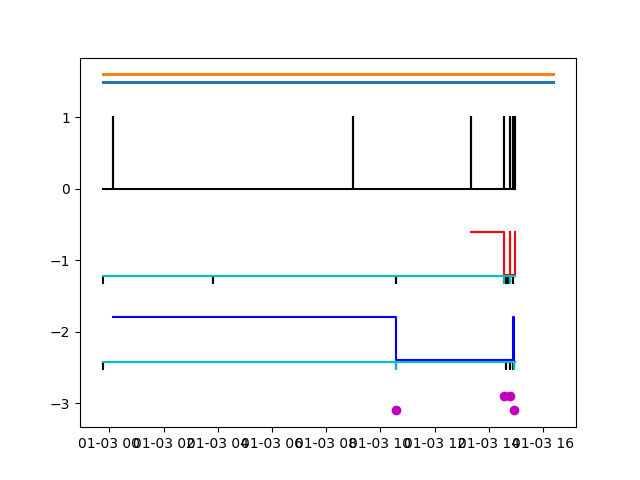

In [ ]:
# find initiation onsets, reward pokes
initiating_events = digital_input_data['DIPort0'][digital_input_data['DIPort0'] == True]
r1_led = utils.concat_digi_events(output_clear['DOPort1'], output_set['DOPort1'])
r2_led = utils.concat_digi_events(output_clear['DOPort2'], output_set['DOPort2'])

plt.figure()
plt.step(digital_input_data.index, digital_input_data['DIPort0'] * 1, where='post', c='k')

plt.step(r1_led.index, r1_led * 0.6 - 1.2, where='post', c='r')
plt.step(digital_input_data.index, digital_input_data['DIPort1'] * -0.1 - 1.22, where='post', c='k')
plt.step(output_set.index, output_set["SupplyPort1"] * -0.1 - 1.22, where='post', c='c')

plt.step(r2_led.index, r2_led * 0.6 - 2.4, where='post', c='b')
plt.step(digital_input_data.index, digital_input_data['DIPort2'] * -0.1 - 2.42, where='post', c='k')
plt.step(output_set.index, output_set["SupplyPort2"] * -0.1 - 2.42, where='post', c='c')

plt.scatter(video_data.index, np.ones((len(video_data.index), 1)) + 0.5, s=0.1)
plt.scatter(heartbeat.index, np.ones((len(heartbeat.index), 1)) + 0.6, s=0.1)
# plt.plot(analog_data.index, analog_data['AnalogInput0'] * 0.1)

# other events that may be useful to look at
plt.scatter(pulse_supply_1.index, np.ones((len(pulse_supply_1.index), 1)) + 0.5 - 4.4, c='m')
plt.scatter(pulse_supply_2.index, np.ones((len(pulse_supply_2.index), 1)) + 0.5 - 4.6, c='m')
plt.scatter(pulse_enable.index, np.ones((len(pulse_supply_2.index), 1)) + 0.5 - 4.6, c='m')

plt.scatter(pulse_enable.index, np.ones((len(pulse_supply_2.index), 1)) + 0.5 - 5.2, c='m')

15


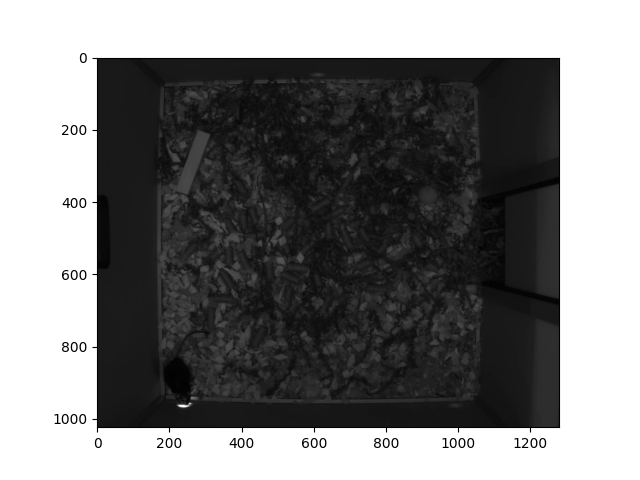

In [18]:
# look at final video frames
tstamp = analog_data.index[-1]
event_window = video_data[(tstamp - pd.Timedelta(seconds=1)) : tstamp]
event_frames = [f for f in video.frames(event_window)]
print(len(event_frames))

plt.figure()
plt.imshow(event_frames[13])